<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/06_uczenie_maszynowe/04_regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
#problemy regresyjne to takie, które starają się przewidzieć zmienną ciągłą

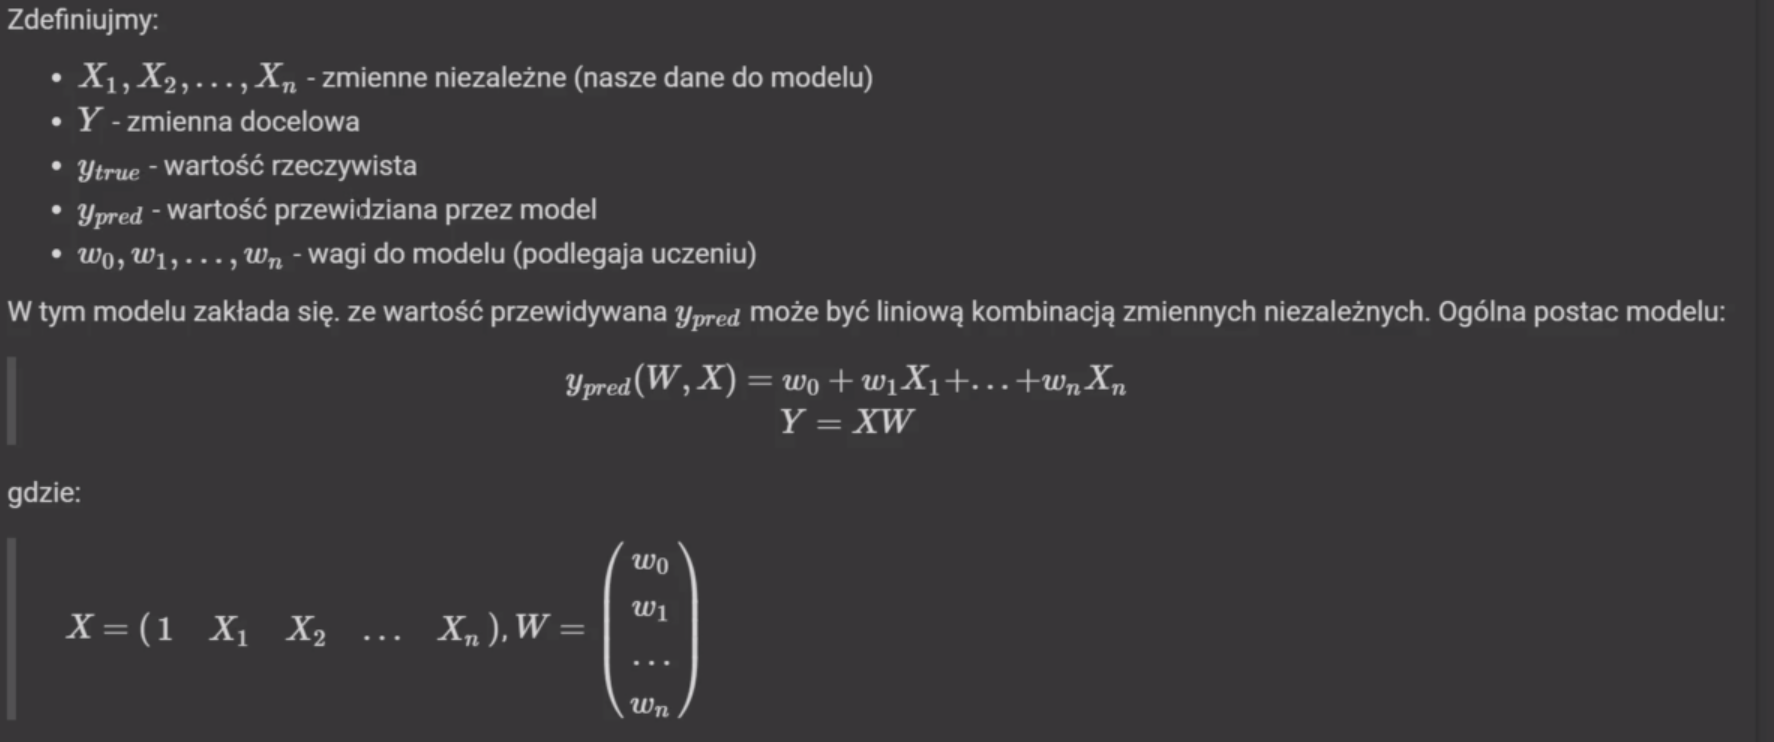

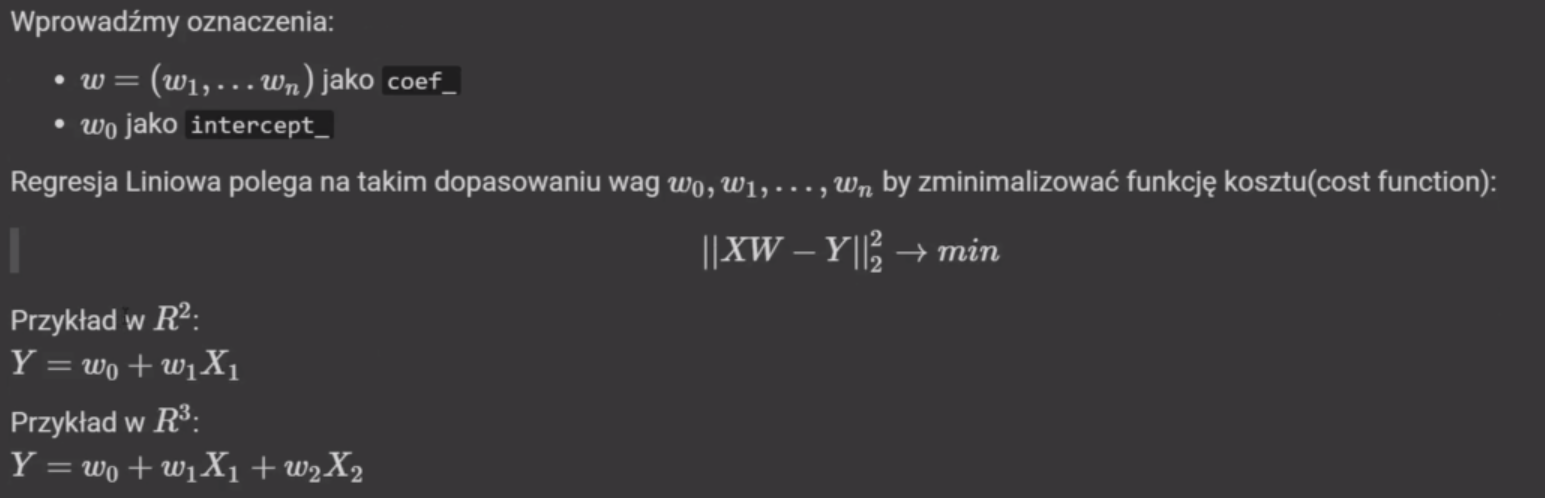

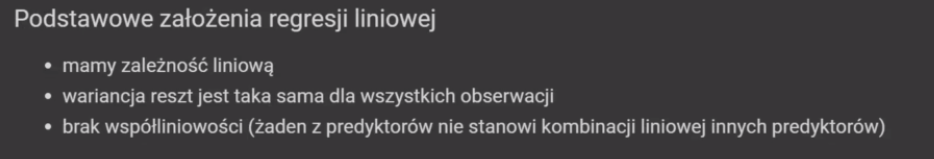

Wygenerowanie danych

In [3]:
import numpy as np

In [4]:
X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('rozmiar X:', X.shape)
print('rozmiar y:', y.shape)

rozmiar X: (100, 1)
rozmiar y: (100,)


Podział danych na zbiór treningowy i testowy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (75, 1)
X_test shape (25, 1)
y_train shape (75,)
y_test shape (25,)


Wizualizacja

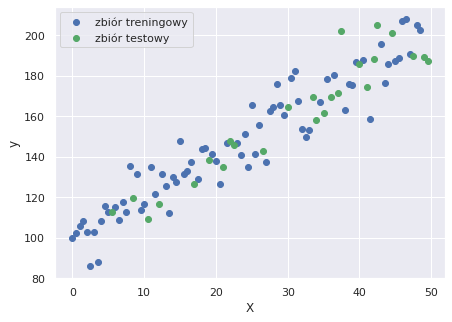

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, c='b', label='zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='zbiór testowy')
plt.xlabel("X")
plt.ylabel('y')
plt.legend()

In [7]:
# jeśli rozkład danych jest nierówny (testowy/treningowy) to jest argument stratify w train_test_split i dzięki temu zbiory się balansują pod kątem wartości zmiennych

Regresja liniowa

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.0311042]
100.2328566982866


Wizualizacja zbioru treningowego i dopasowanego modelu

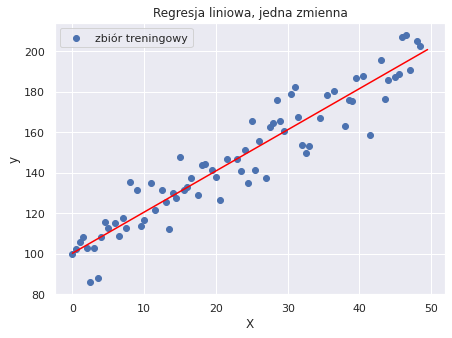

In [10]:
plt.figure(figsize=(7,5))
plt.title('Regresja liniowa, jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Wizualizacja zbioru testowego i dopasowanego modelu

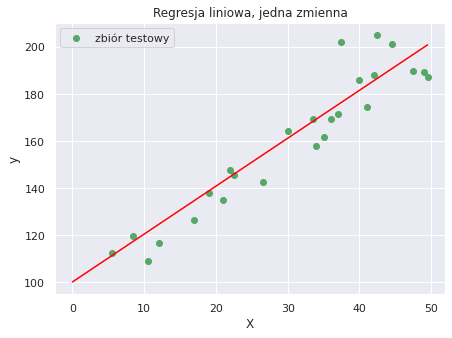

In [11]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(7,5))
plt.title('Regresja liniowa, jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [12]:
#kluczowe jest testowanie modelu na danych, których model nie widział

In [13]:
lin_reg.score(X_test, y_test)

0.8911327406262419

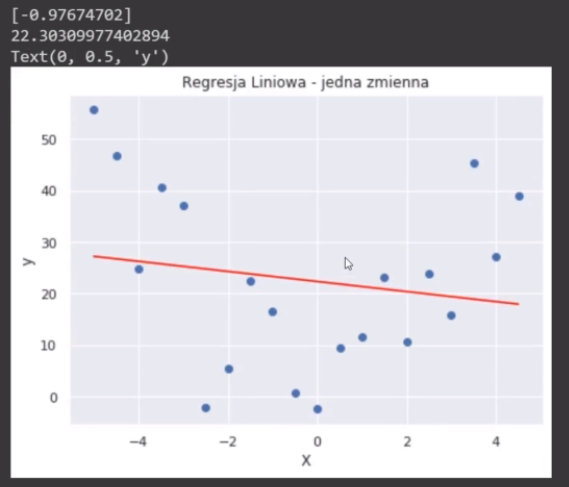

In [14]:
#powyżej błędne zastosowanie regresji liniowej - dane nie mają zależności liniowej wobec tego model jest niedopasowany. Tu zadziałaby regresja wielomianowa, która dopasuje kształt wielomianu